## 1.0 Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
loan_dir = './../data/raw/loan.csv'
payment_dir = './../data/raw/payment.csv'
cuv_dir = './../data/raw/clarity_underwriting_variables.csv'

In [3]:
# read the dataset
loan_df = pd.read_csv(loan_dir)
payment_df = pd.read_csv(payment_dir)
cuv_df = pd.read_csv(cuv_dir)

print(loan_df.shape)
print(payment_df.shape)
print(cuv_df.shape)

(577682, 19)
(689364, 9)
(49752, 54)


C:\Users\BELLA\AppData\Local\Temp\ipykernel_24592\1826984821.py:4: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  cuv_df = pd.read_csv(cuv_dir)


### Combine Dataset

In [4]:
# merge the dataset
# loan_df: loanId, clarityFraudId (underwritingid)
# payment_df: loanId, 
# cuv_df: underwritingid (clarityFraudId)

# loanId: key appear in both df
# ensure load_df records are kept
merged_df_1 = pd.merge(loan_df, payment_df, on='loanId', how='left')

# 
df = pd.merge(merged_df_1, cuv_df, left_on='clarityFraudId', right_on='underwritingid', how='left')
print(df.head(10))
print(df.shape)

          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
3  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
4  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
5  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
6  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
7  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
8  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
9  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   

              applicationDate  originated              originatedDate  \
0  2016-02-23T17:29:01.940000       False                         NaN   
1  2016-01-19T22:07:36.778000        Tr

In [5]:
# checking the target column
loanStatus_percetage = df.loanStatus.value_counts(normalize=True, dropna=False) * 100
print(loanStatus_percetage)

loanStatus
Withdrawn Application          36.758716
External Collection            17.704104
Paid Off Loan                  15.389204
New Loan                       10.528289
Internal Collection             7.668280
Rejected                        6.932639
Returned Item                   1.433387
Settlement Paid Off             1.151094
Credit Return Void              0.911748
Customer Voided New Loan        0.486352
Settled Bankruptcy              0.451473
Pending Paid Off                0.220440
Charged Off Paid Off            0.205934
CSR Voided New Loan             0.112705
NaN                             0.031864
Pending Rescind                 0.006764
Voided New Loan                 0.003178
Charged Off                     0.001059
Settlement Pending Paid Off     0.001059
Customver Voided New Loan       0.000978
Pending Application Fee         0.000407
Pending Application             0.000326
Name: proportion, dtype: float64


### Checking & Handling Missing Values

<Axes: >

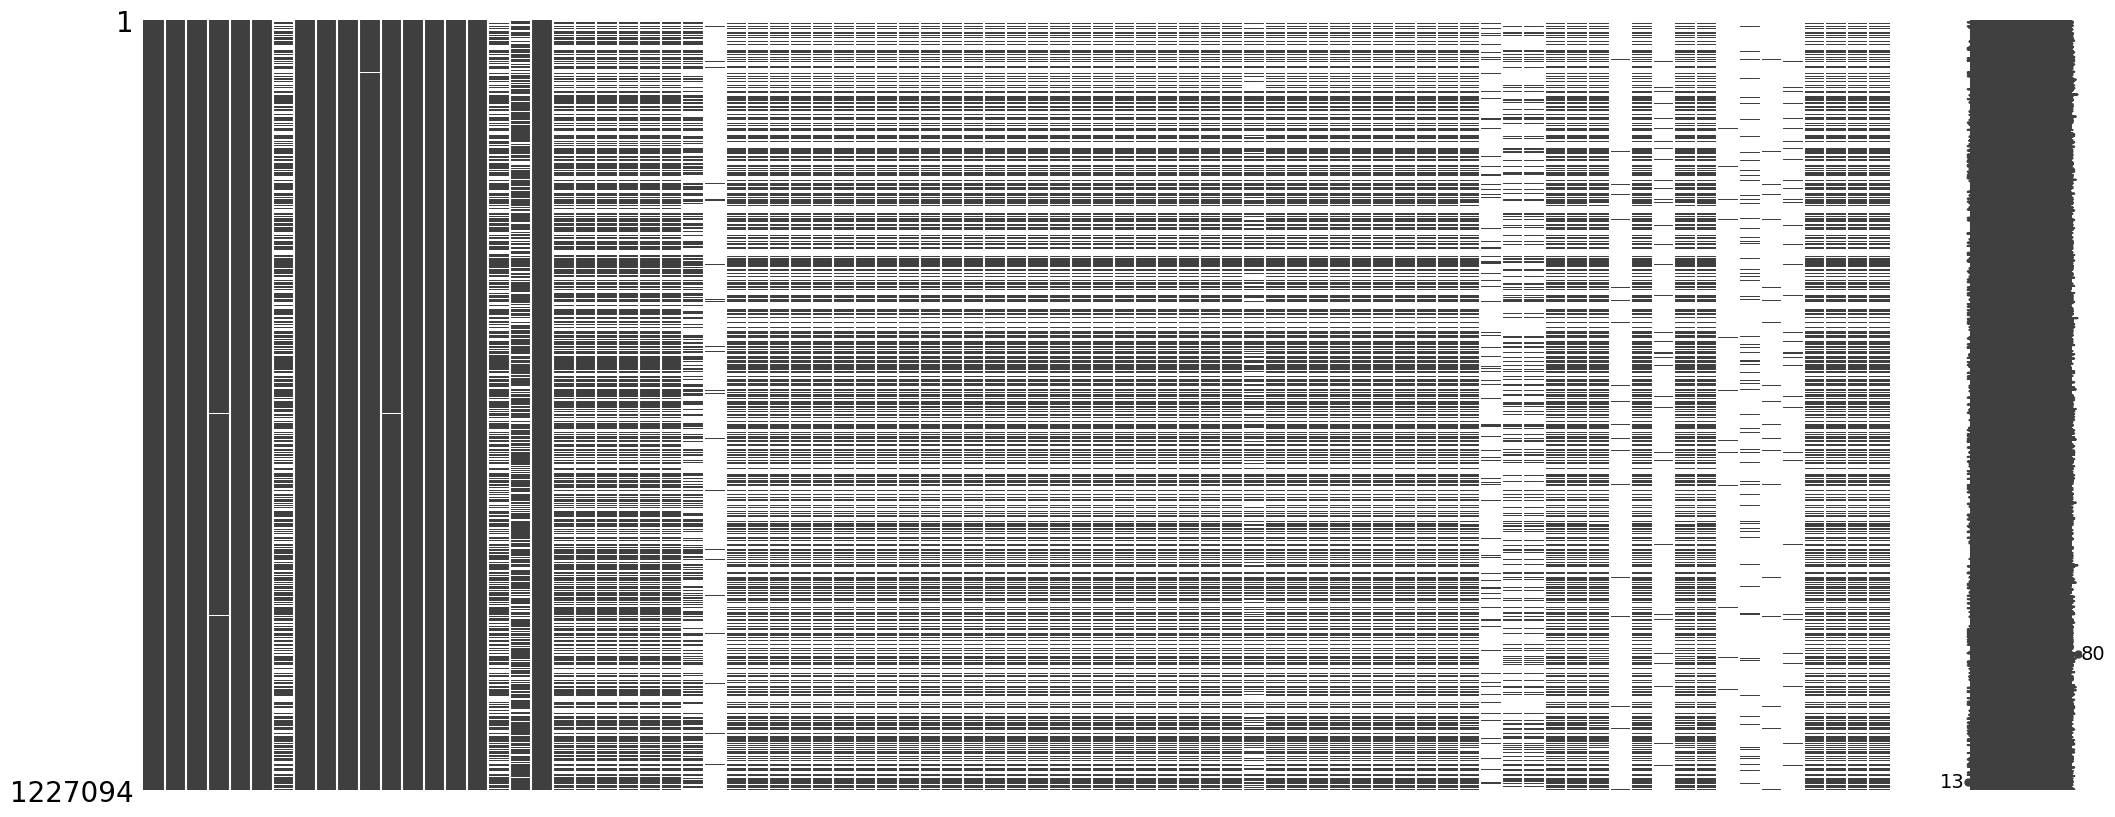

In [60]:
msno.matrix(df)

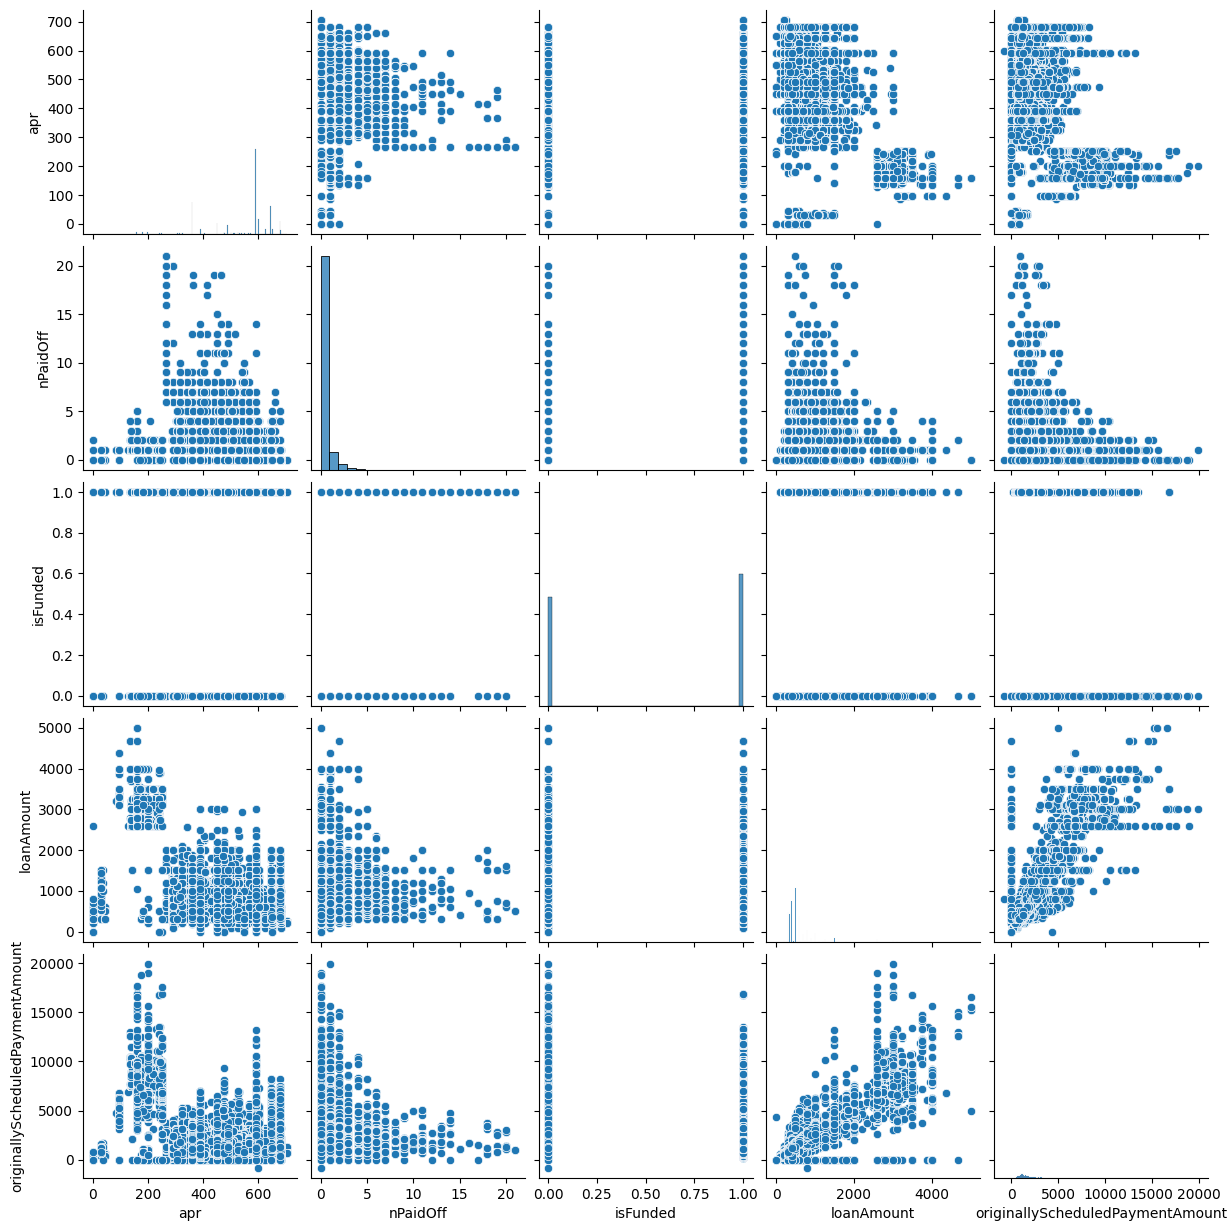

In [6]:
num_cols = df.select_dtypes(include=['number']) # grab all of the numerical columns
num_cols = num_cols.iloc[:, :5] # only select 5 cols
sns.pairplot(num_cols) # to see the data distribution
plt.show()

In [7]:
def missing_values_table(df, threshold=0):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Filter by the percentage of missing values greater than the threshold
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns['% of Total Values'] > threshold]
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values above the threshold.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [8]:
df_missing= missing_values_table(df, threshold=60)
df_missing

Your selected dataframe has 81 columns.
There are 10 columns that have missing values above the threshold.


,Missing Values,% of Total Values
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,1210061,98.6
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription,1197730,97.6
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,1197730,97.6
paymentReturnCode,1195561,97.4
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,1163537,94.8
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,1163537,94.8
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,1121913,91.4
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile,1116676,91.0
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone,955361,77.9
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone,955361,77.9


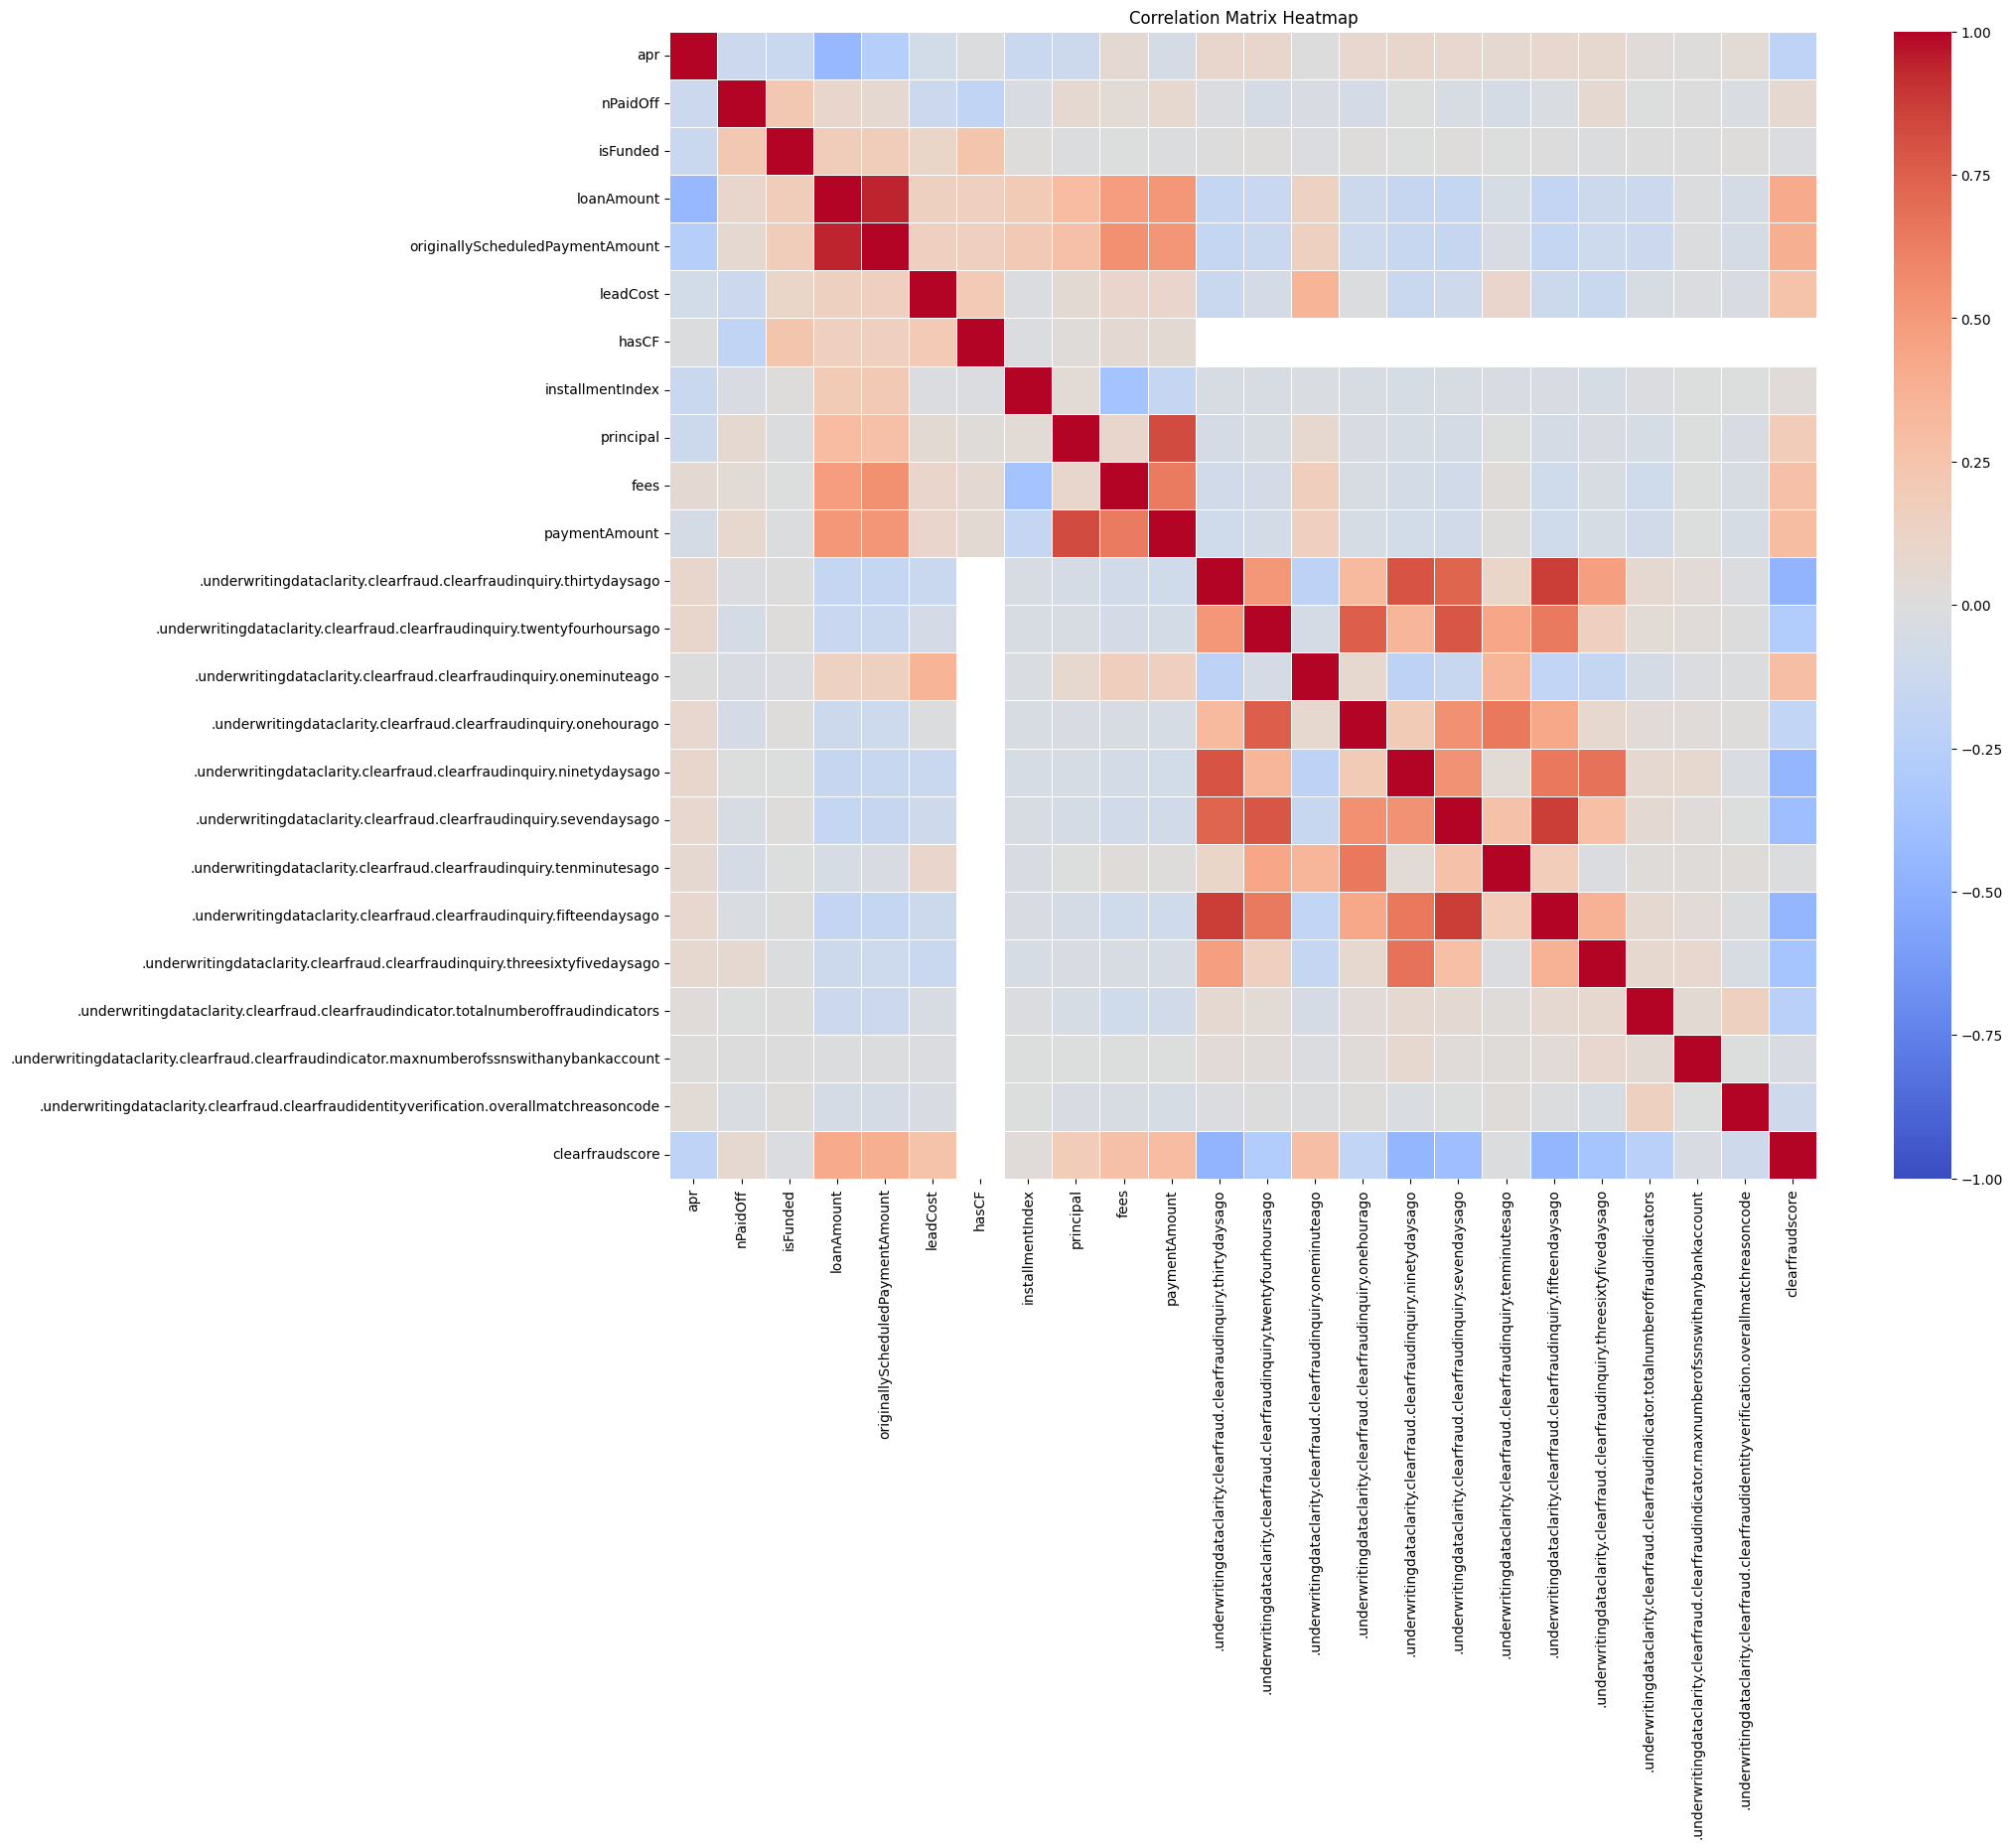

In [9]:
num_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True,
                      annot_kws={"size": 10}, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: >

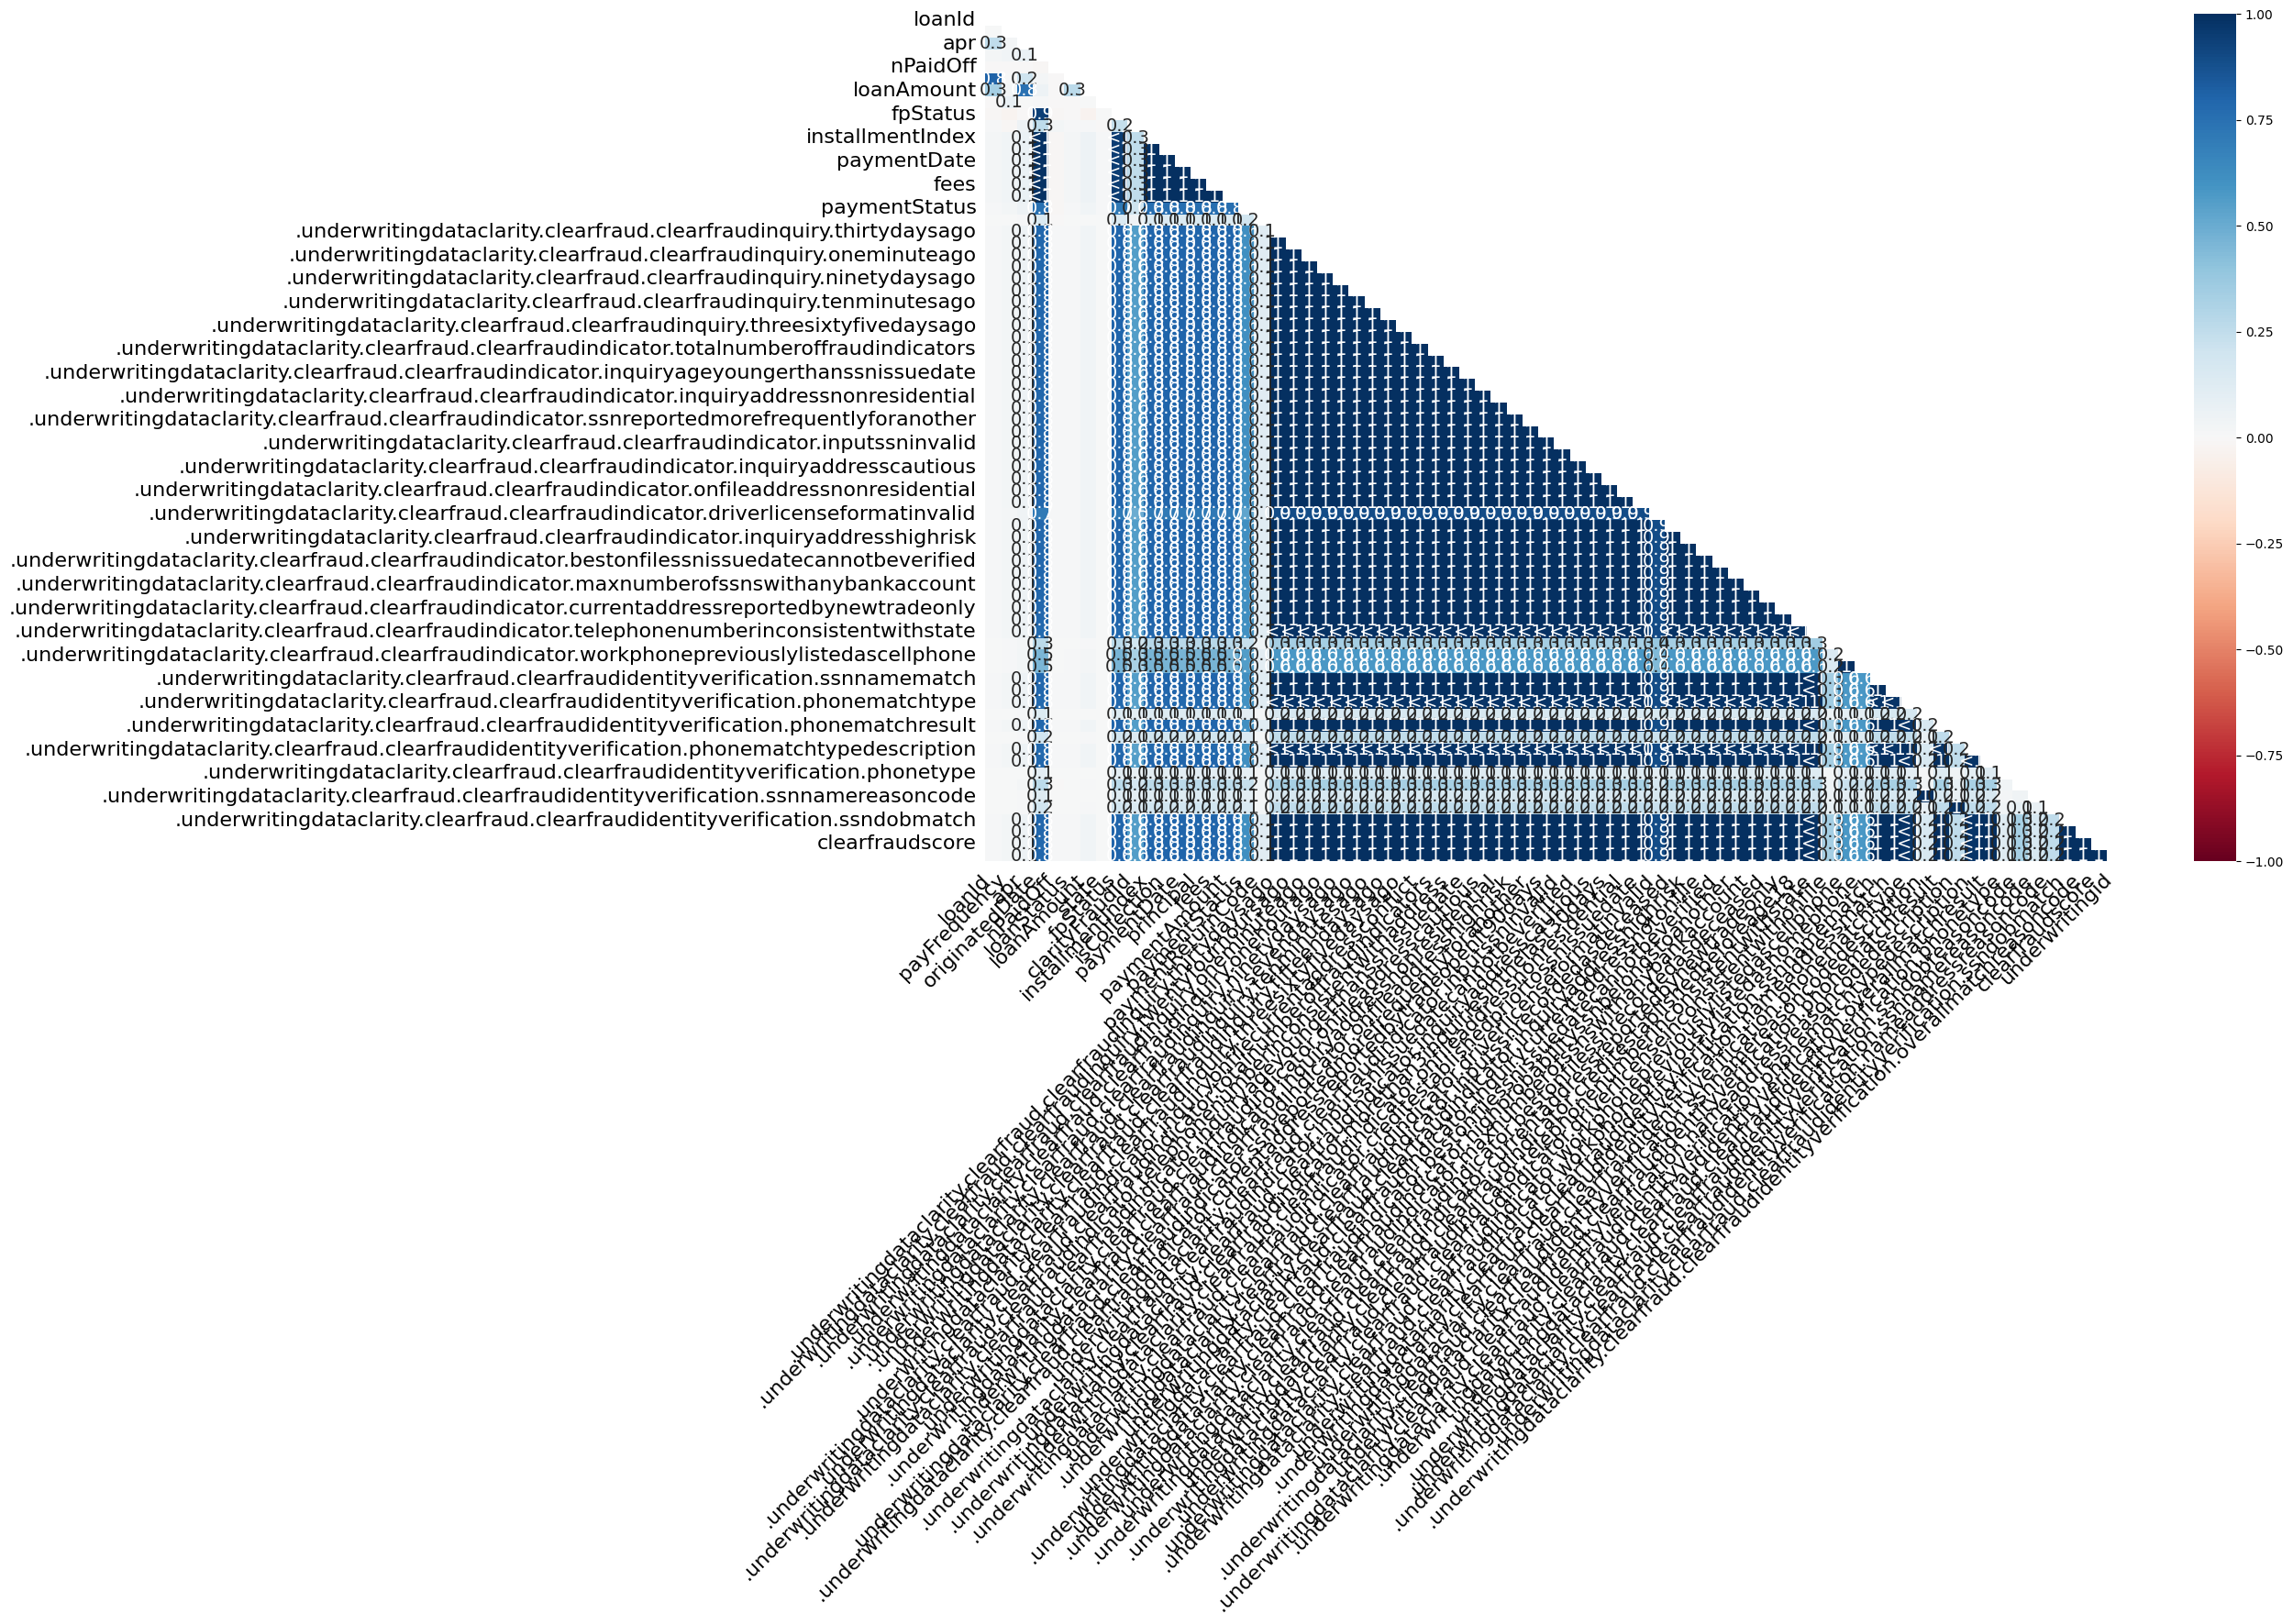

In [10]:
msno.heatmap(df)

<Axes: >

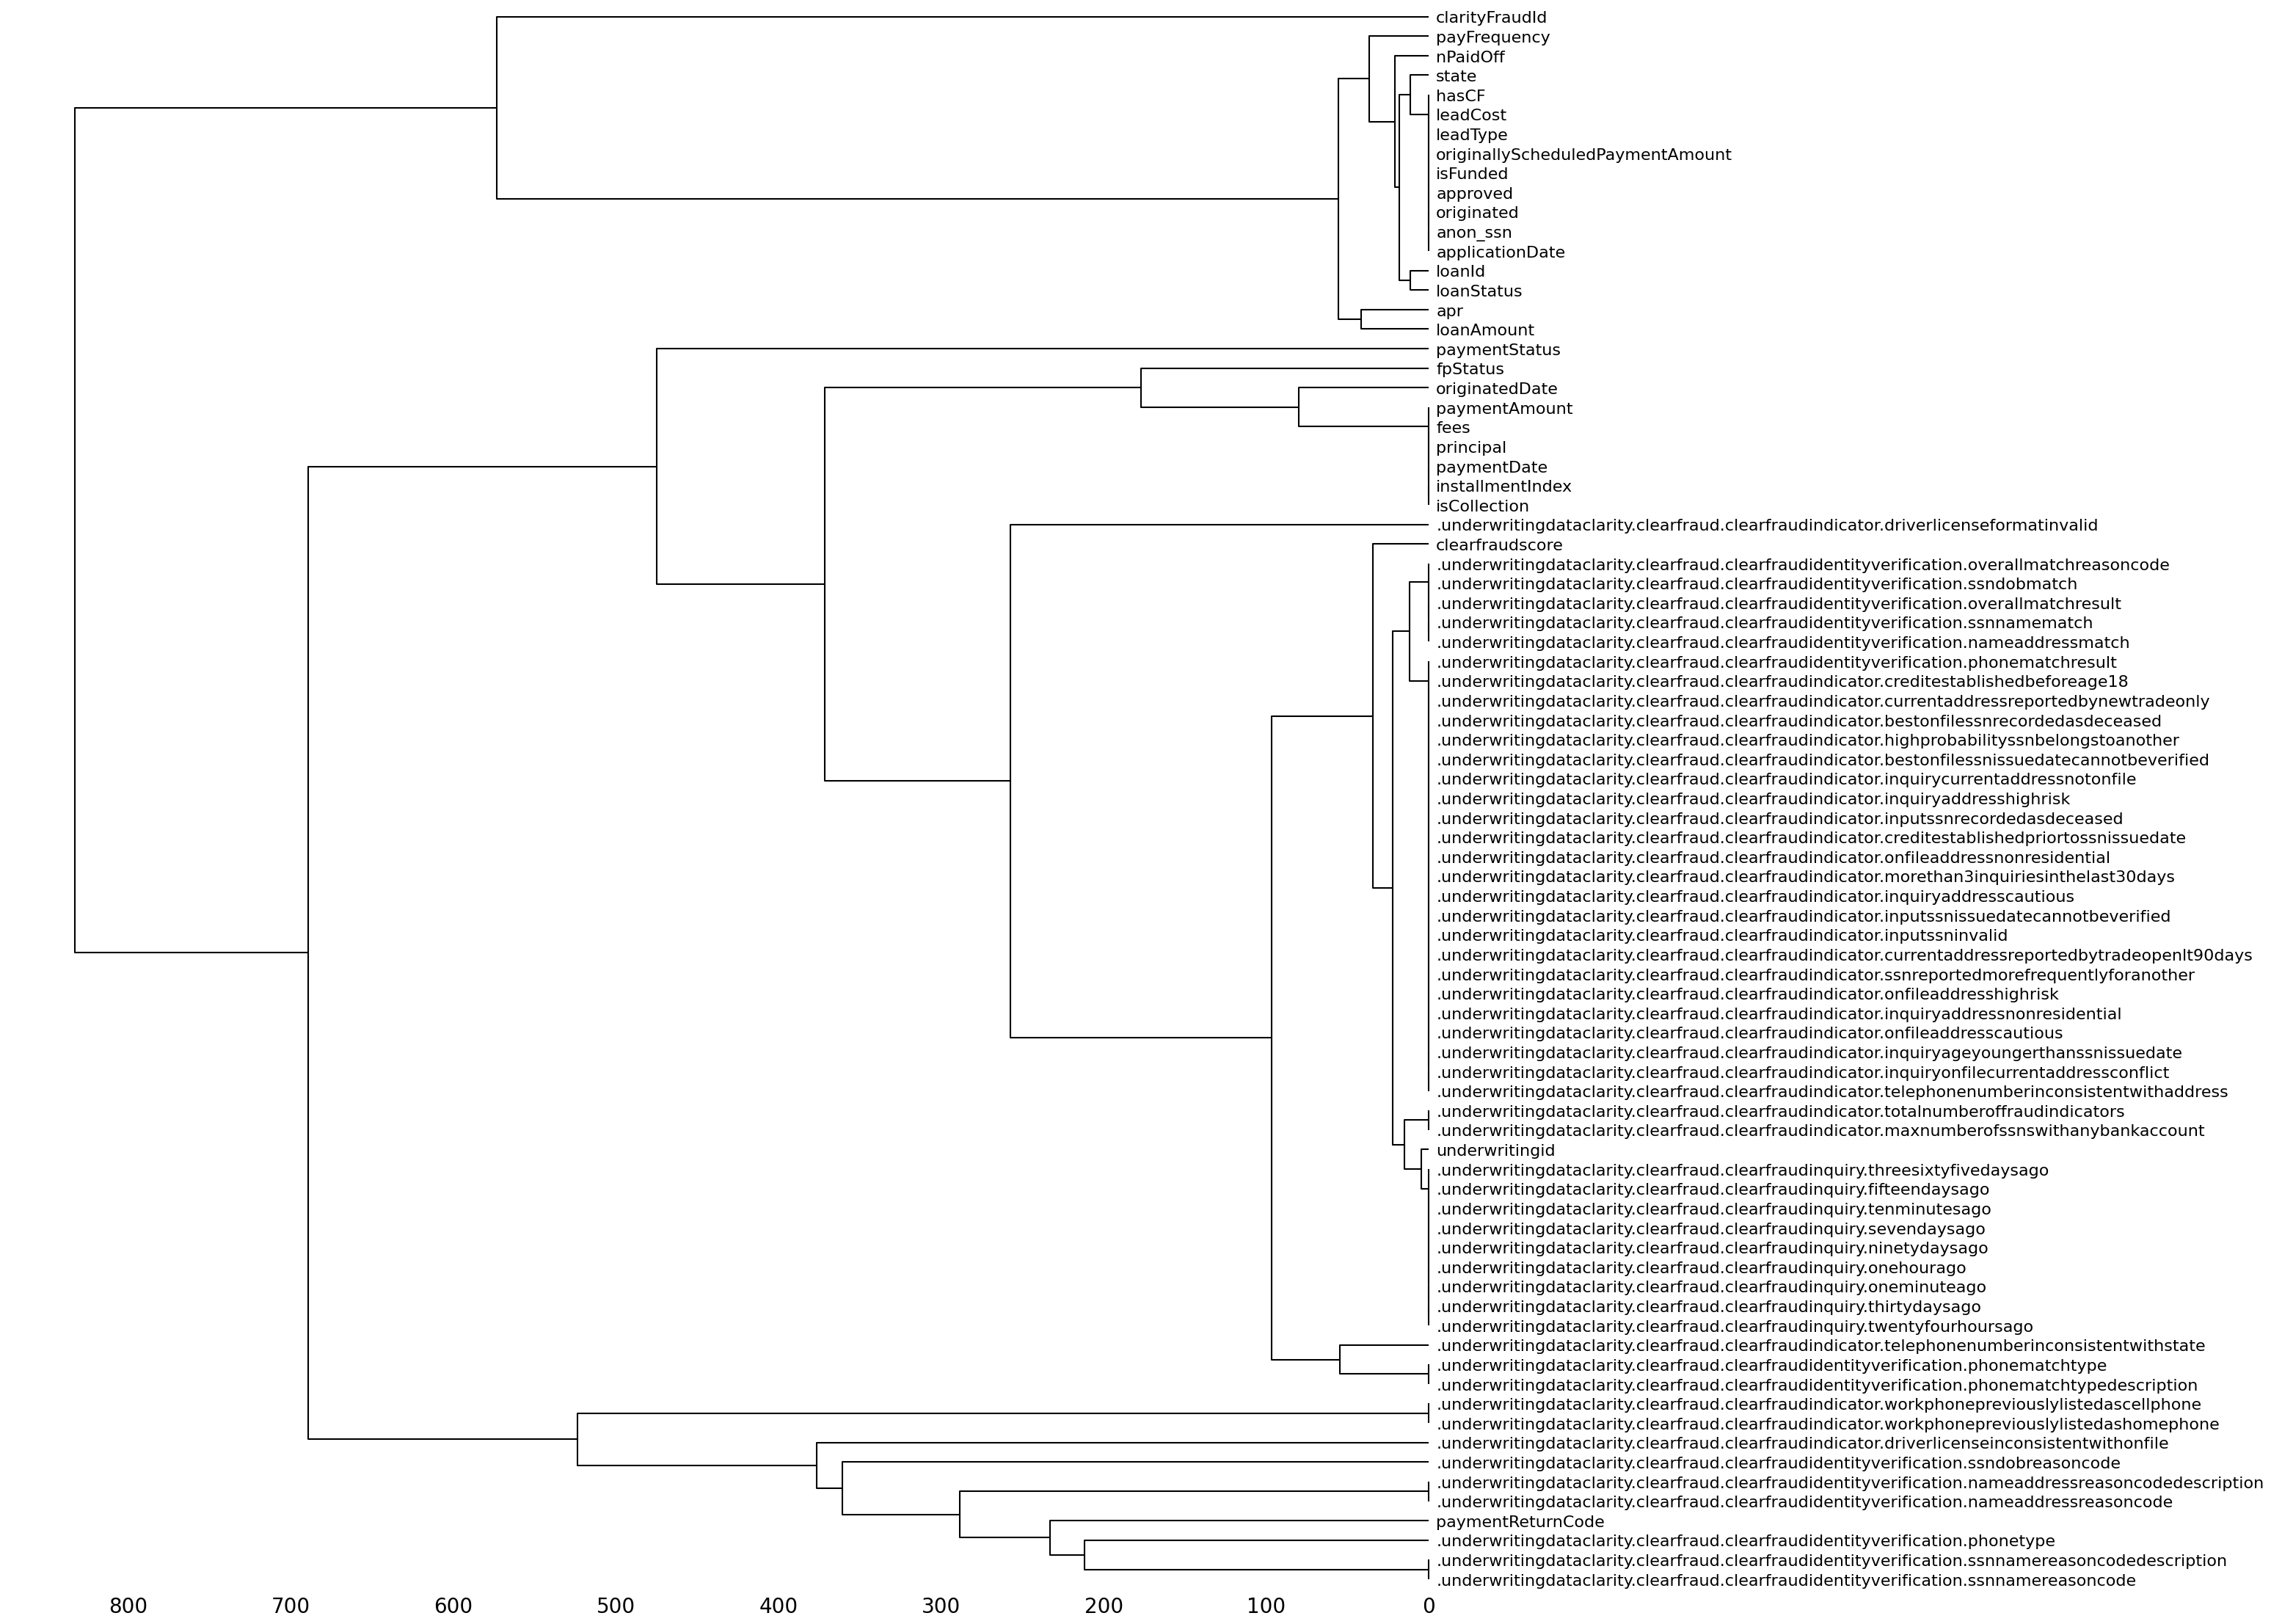

In [11]:
msno.dendrogram(df)